In [1]:
reset -fs

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

In [4]:
obs = pd.read_csv('path_obs_clean_2021.csv')

/Users/noether/miniforge3/envs/eclipse/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
target = obs.CLEAR.value_counts(normalize=True)
print(target)
# target.plot(kind='bar')

False    0.567978
True     0.432022
Name: CLEAR, dtype: float64


In [6]:
# features = obs[['LATITUDE', 'LONGITUDE',
#        'ELEVATION', 'ALTSE', 'DP', 'TEMP', 'PCP', 'RH', 'STP',
#        'VIS', 'WB_TEMP', 'WIND_DIR', 'WIND','CLEAR']].apply(pd.to_numeric, errors='coerce')

In [7]:
# def plot_features(df, sample_size=500):
    
#     sample = (features.sample(100000, random_state=42)) 
    
#     sns.pairplot(sample,hue='CLEAR', plot_kws=dict(alpha=.3, edgecolor='none'))

# plot_features(obs)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(obs.iloc[:, 5:9], obs.iloc[:, -1], 
                                                    test_size = 0.99, random_state=42)

train_df = X_train.copy()
train_df['CLEAR'] = y_train
train_df.head()

LATITUDE  LONGITUDE  ELEVATION  ALTSE  CLEAR
356858   31.66600  -98.14900      396.2  29.91   True
2049497  31.15000  -97.41667      207.9  30.02  False
1847912  44.05000  -75.73333      209.7  30.40  False
660667   31.17833  -99.32444      556.9  29.67   True
777499   36.76973  -90.32241       99.6  29.57  False

In [9]:
train_df['ALTSE']

356858     29.91
2049497    30.02
1847912    30.40
660667     29.67
777499     29.57
           ...  
110268     30.17
1692743    30.20
2356330    29.99
2229084    30.14
2219110    30.06
Name: ALTSE, Length: 26142, dtype: float64

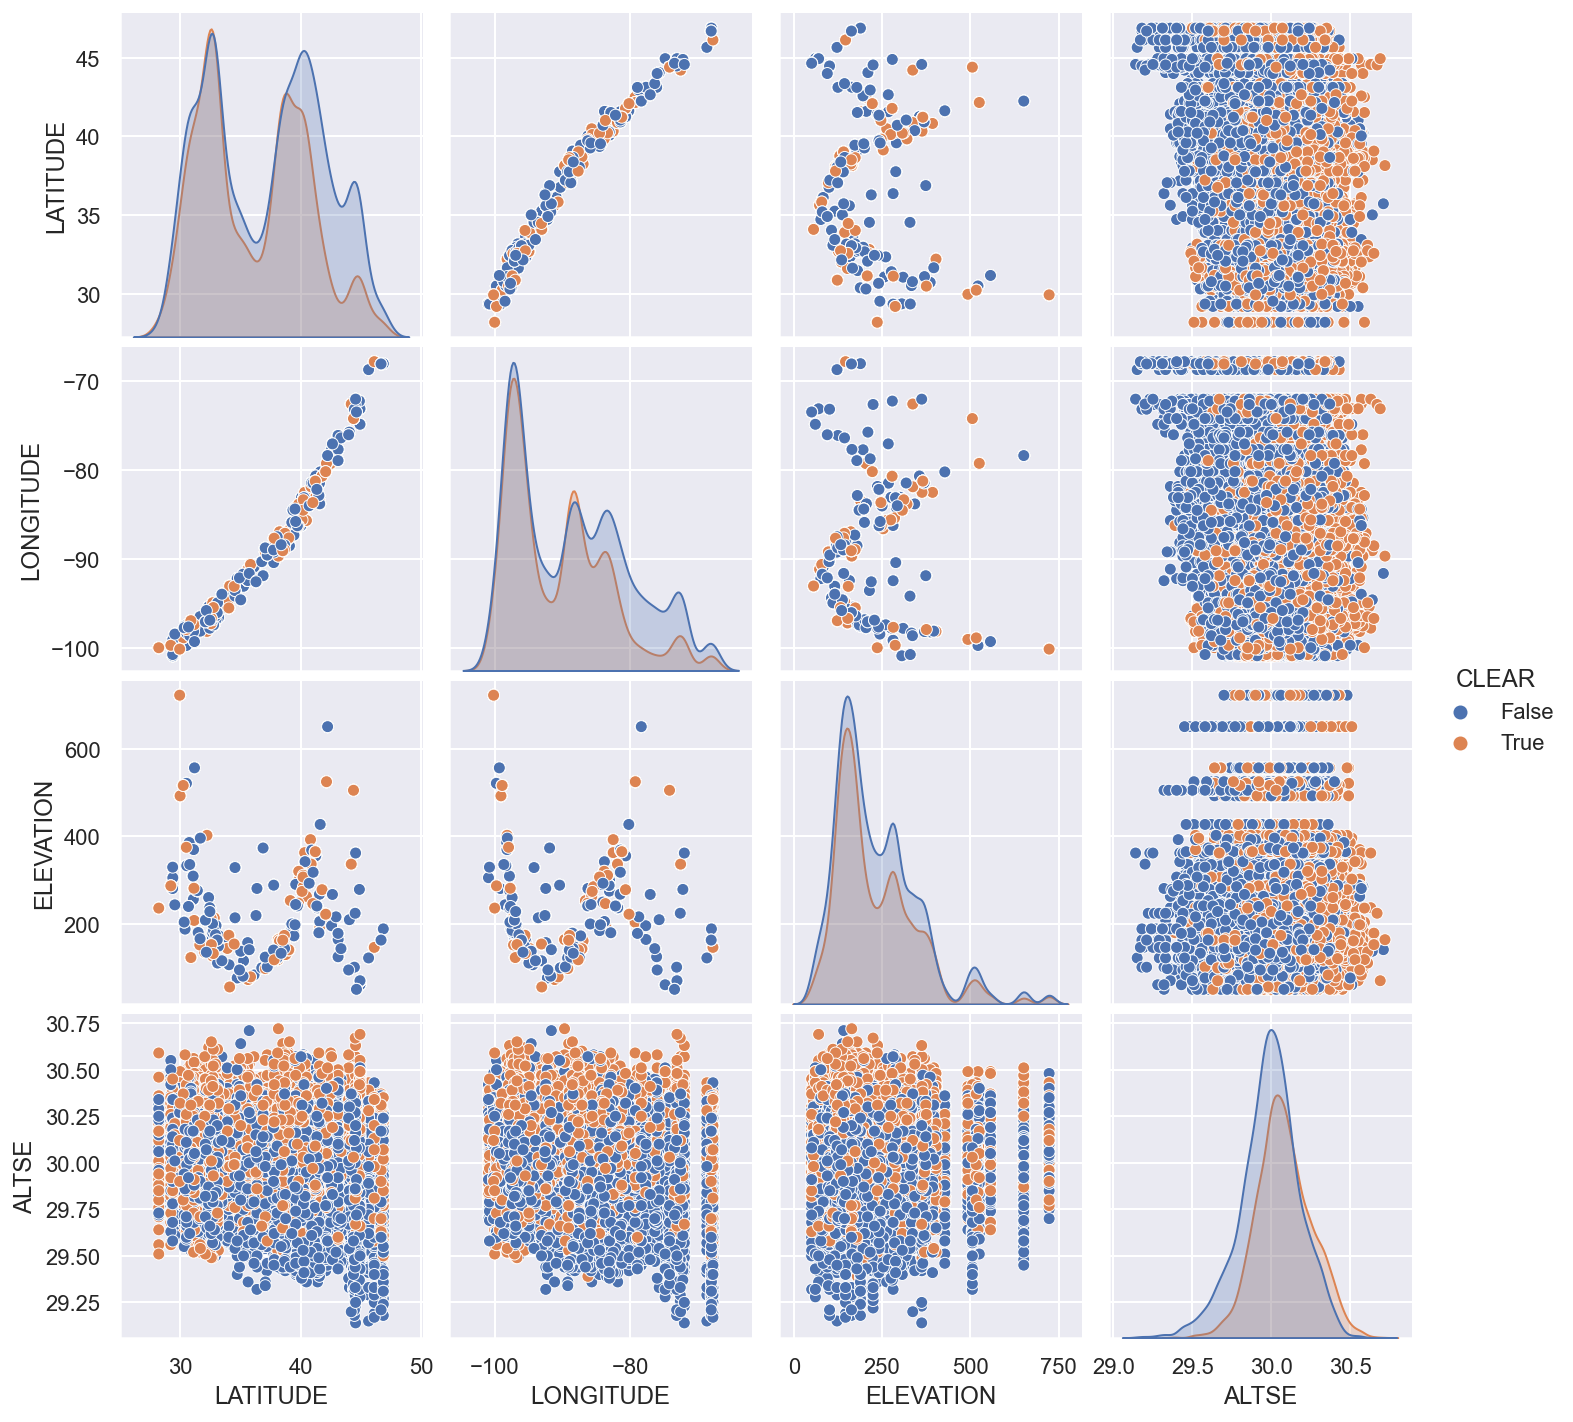

In [10]:
sns.pairplot(train_df, hue='CLEAR');

In [11]:
np.mean(y_train)

0.4349705454823655

In [12]:
# X_train.ALTSE.hist()

In [13]:
mask1 = (X_train.ALTSE>=29.3) & (X_train.ALTSE<=29.8)
mask2 = (X_train.ALTSE>=29.8) & (X_train.ALTSE<=30)
mask3 = (X_train.ALTSE>=30) & (X_train.ALTSE<=30.5)

In [14]:
np.mean(y_train[mask1]), np.mean(y_train[mask2]), np.mean(y_train[mask3])

(0.2026578073089701, 0.3763845813026141, 0.5078682888124835)

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'ALTSE'], bins=25, range=(29,31))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'ALTSE'], bins=25, range=(29,31))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

In [15]:
# X_train.LATITUDE.hist()

/var/folders/_g/0w700wks7s1f9mzvhbcn7vvc0000gn/T/ipykernel_26381/1489230209.py:5: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));


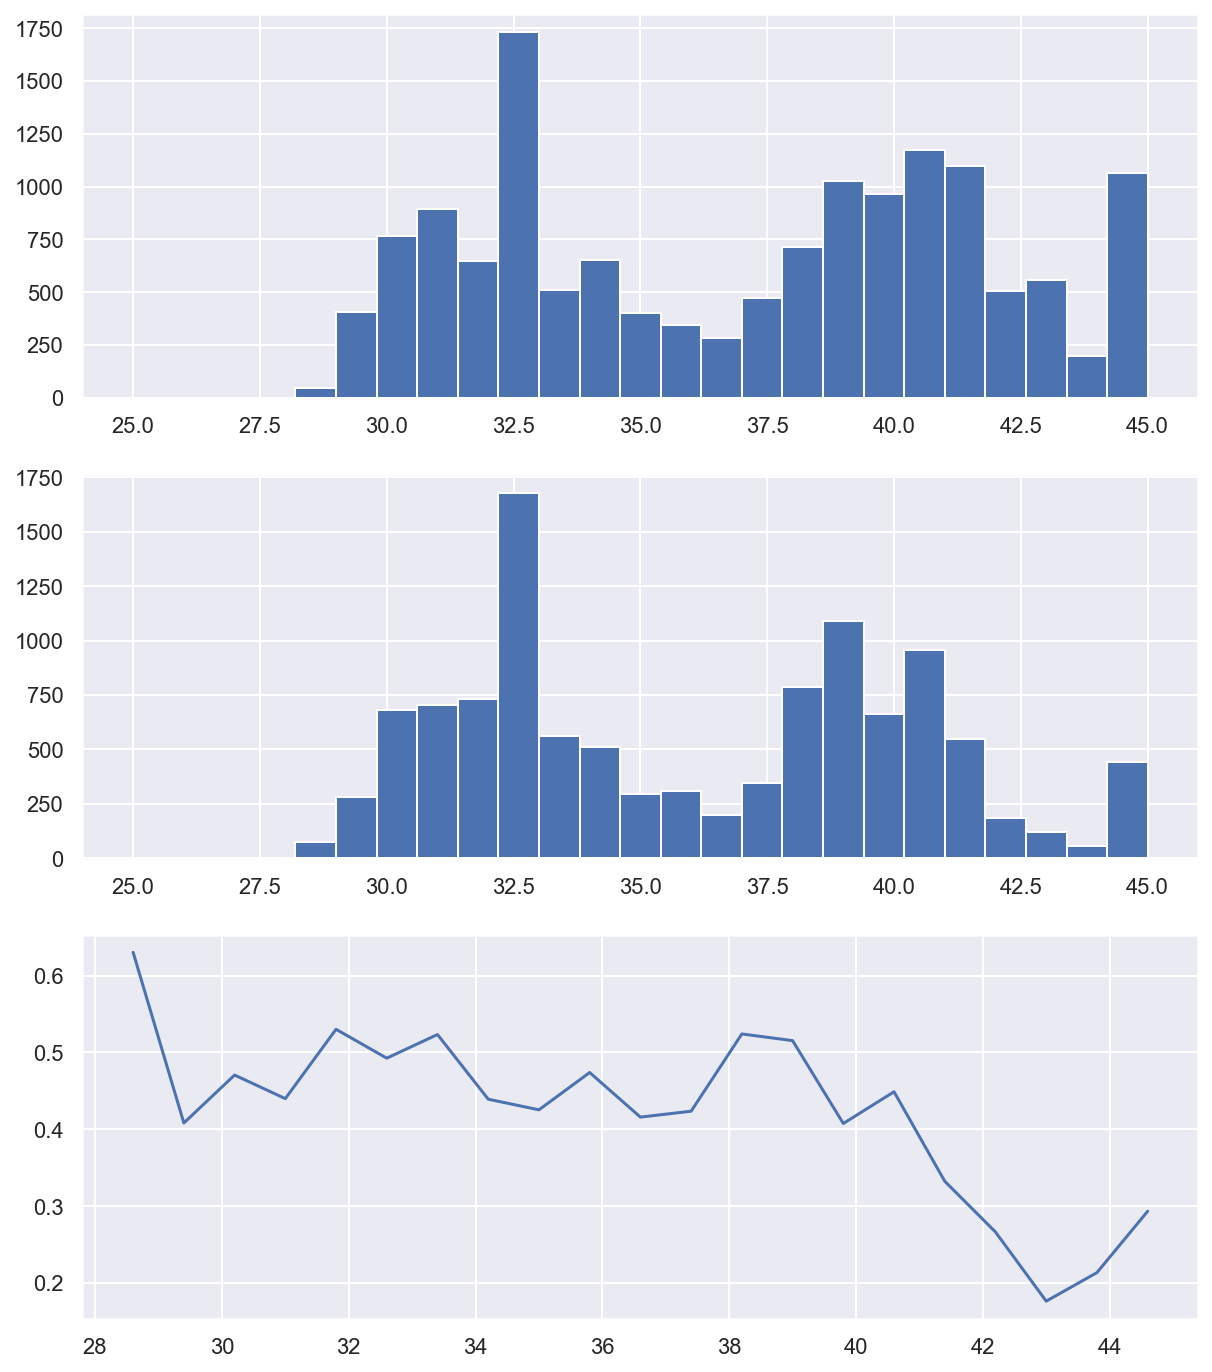

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'LATITUDE'], bins=25, range=(25,45))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'LATITUDE'], bins=25, range=(25,45))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

In [17]:
# X_train.LONGITUDE.hist()

/var/folders/_g/0w700wks7s1f9mzvhbcn7vvc0000gn/T/ipykernel_26381/1551329854.py:5: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));


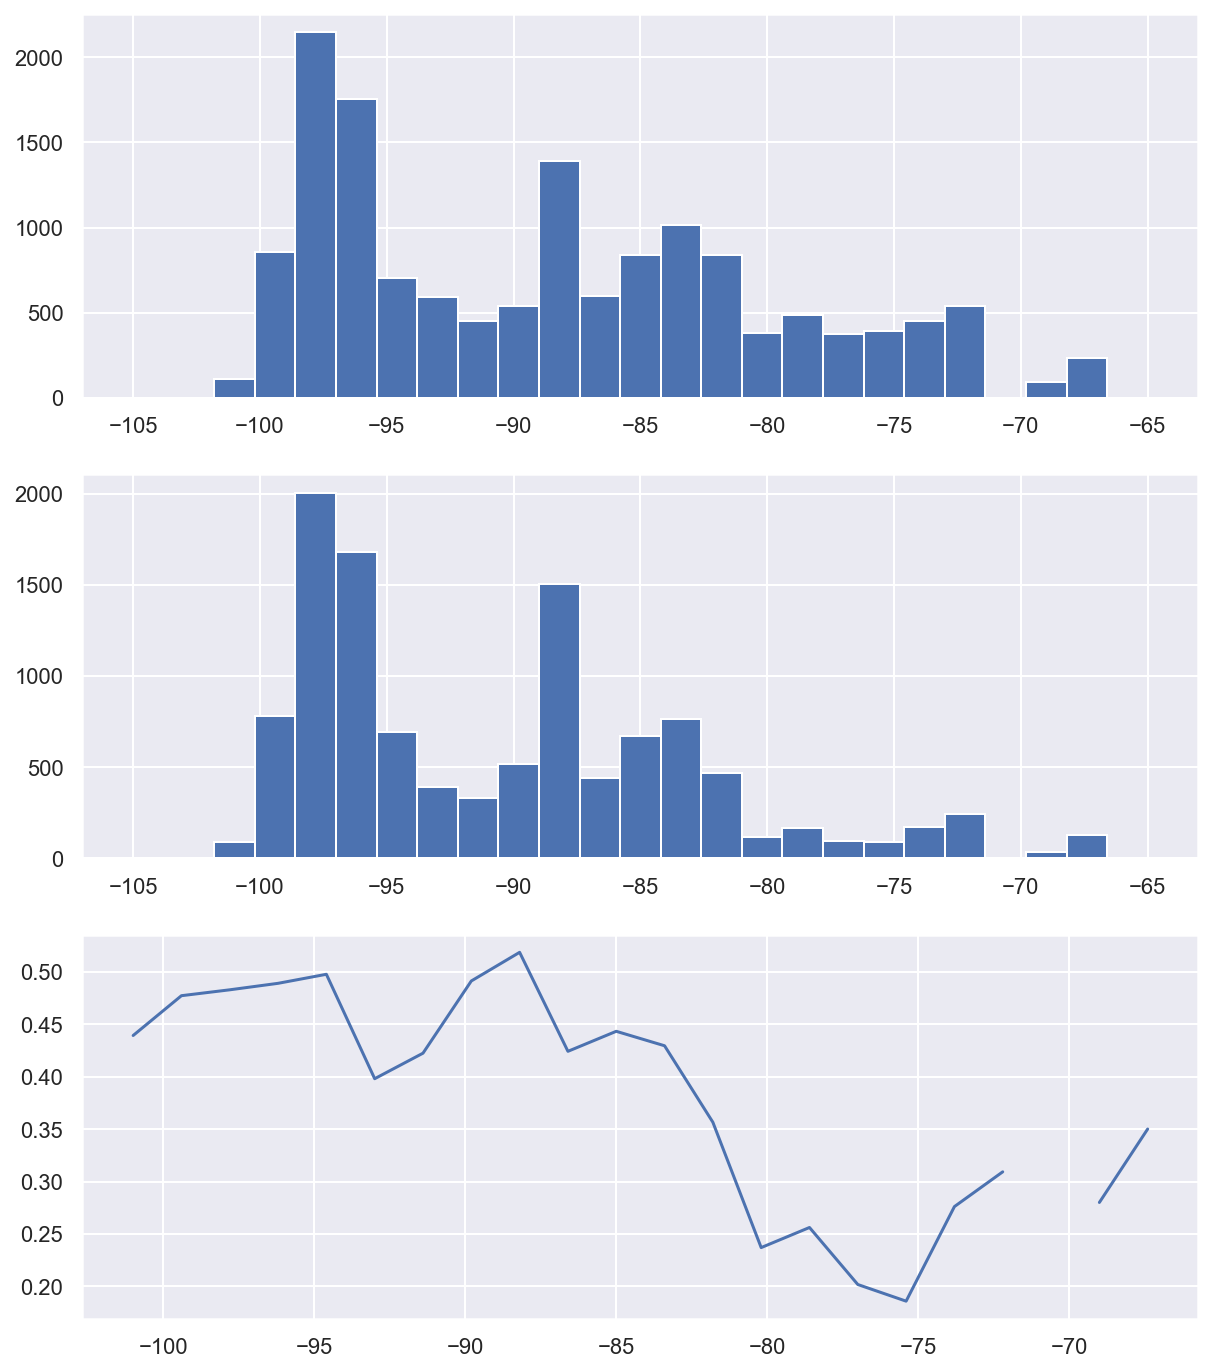

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'LONGITUDE'], bins=25, range=(-105,-65))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'LONGITUDE'], bins=25, range=(-105,-65))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

In [19]:
# X_train.ELEVATION.hist()

/var/folders/_g/0w700wks7s1f9mzvhbcn7vvc0000gn/T/ipykernel_26381/2819103137.py:5: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));


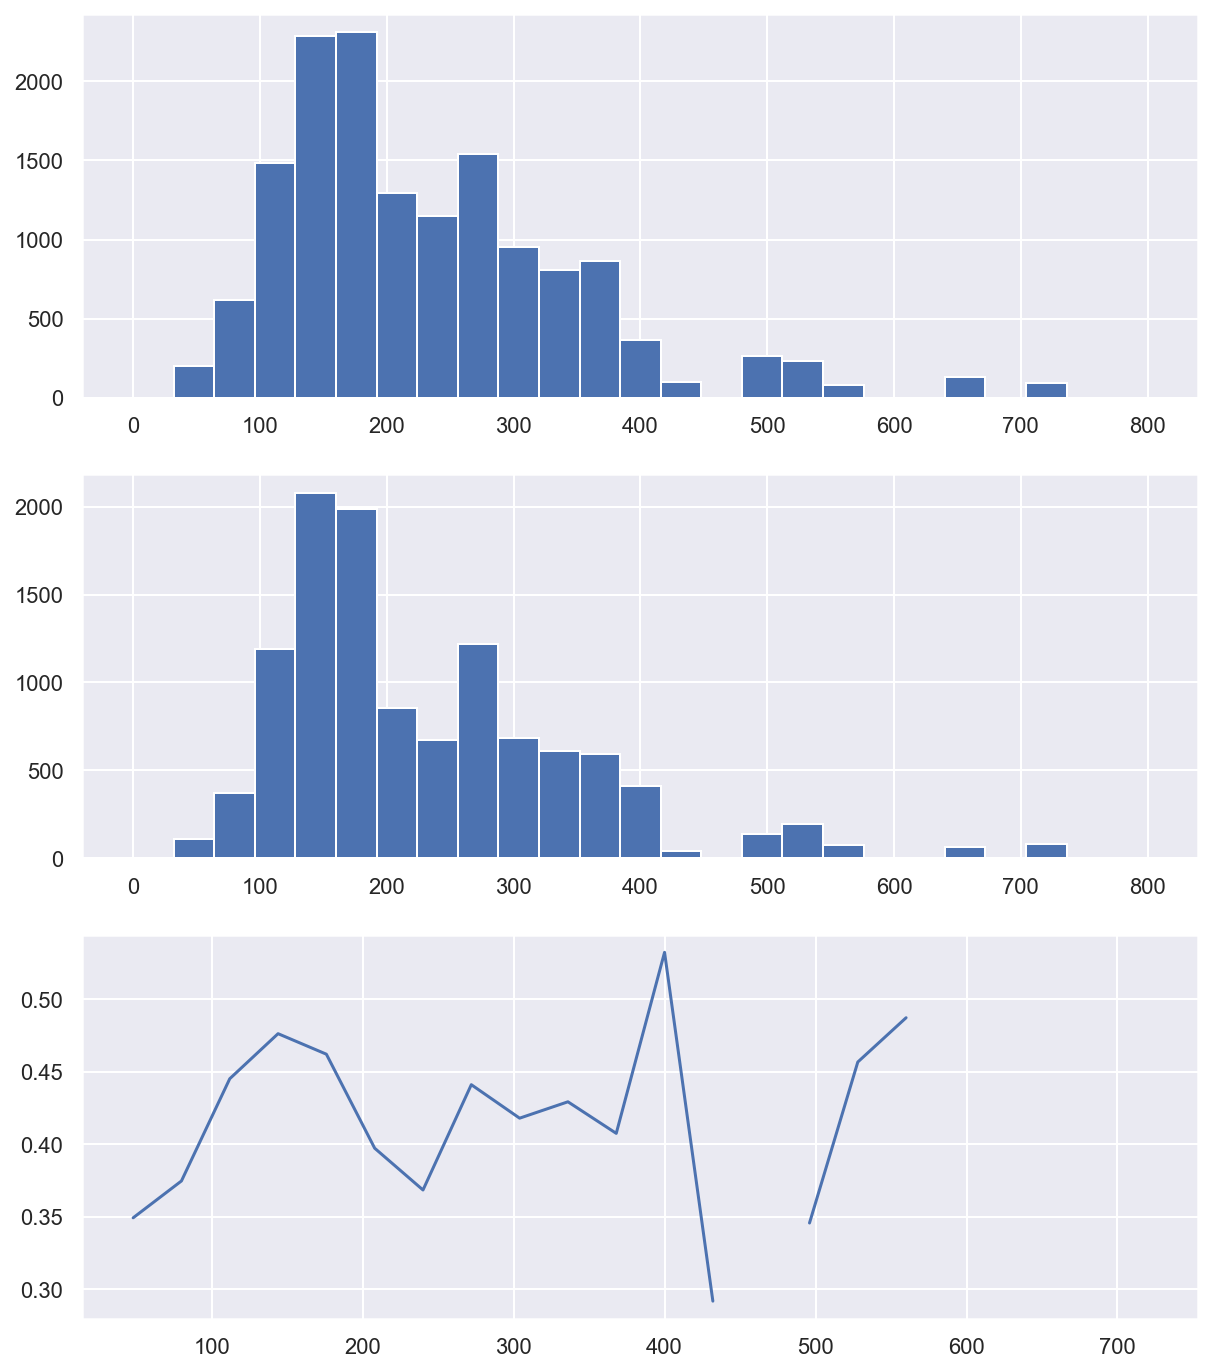

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'ELEVATION'], bins=25, range=(0,800))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'ELEVATION'], bins=25, range=(0,800))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

# Next five features

In [21]:
X_train, X_test, y_train, y_test = train_test_split(obs.iloc[:, 9:14], obs.iloc[:, -1], 
                                                    test_size = 0.99, random_state=42)

train_df = X_train.copy()
train_df['CLEAR'] = y_train
train_df.head()

DP  TEMP  PCP    RH    STP  CLEAR
356858   71.0  75.0  0.0  88.0  28.53   True
2049497  21.0  22.0  0.0  96.0  29.29  False
1847912  55.0  57.0  0.0  94.0  29.65  False
660667   66.0  81.0  0.0  62.0  27.76   True
777499   57.0  60.0  0.0  90.0  29.22  False

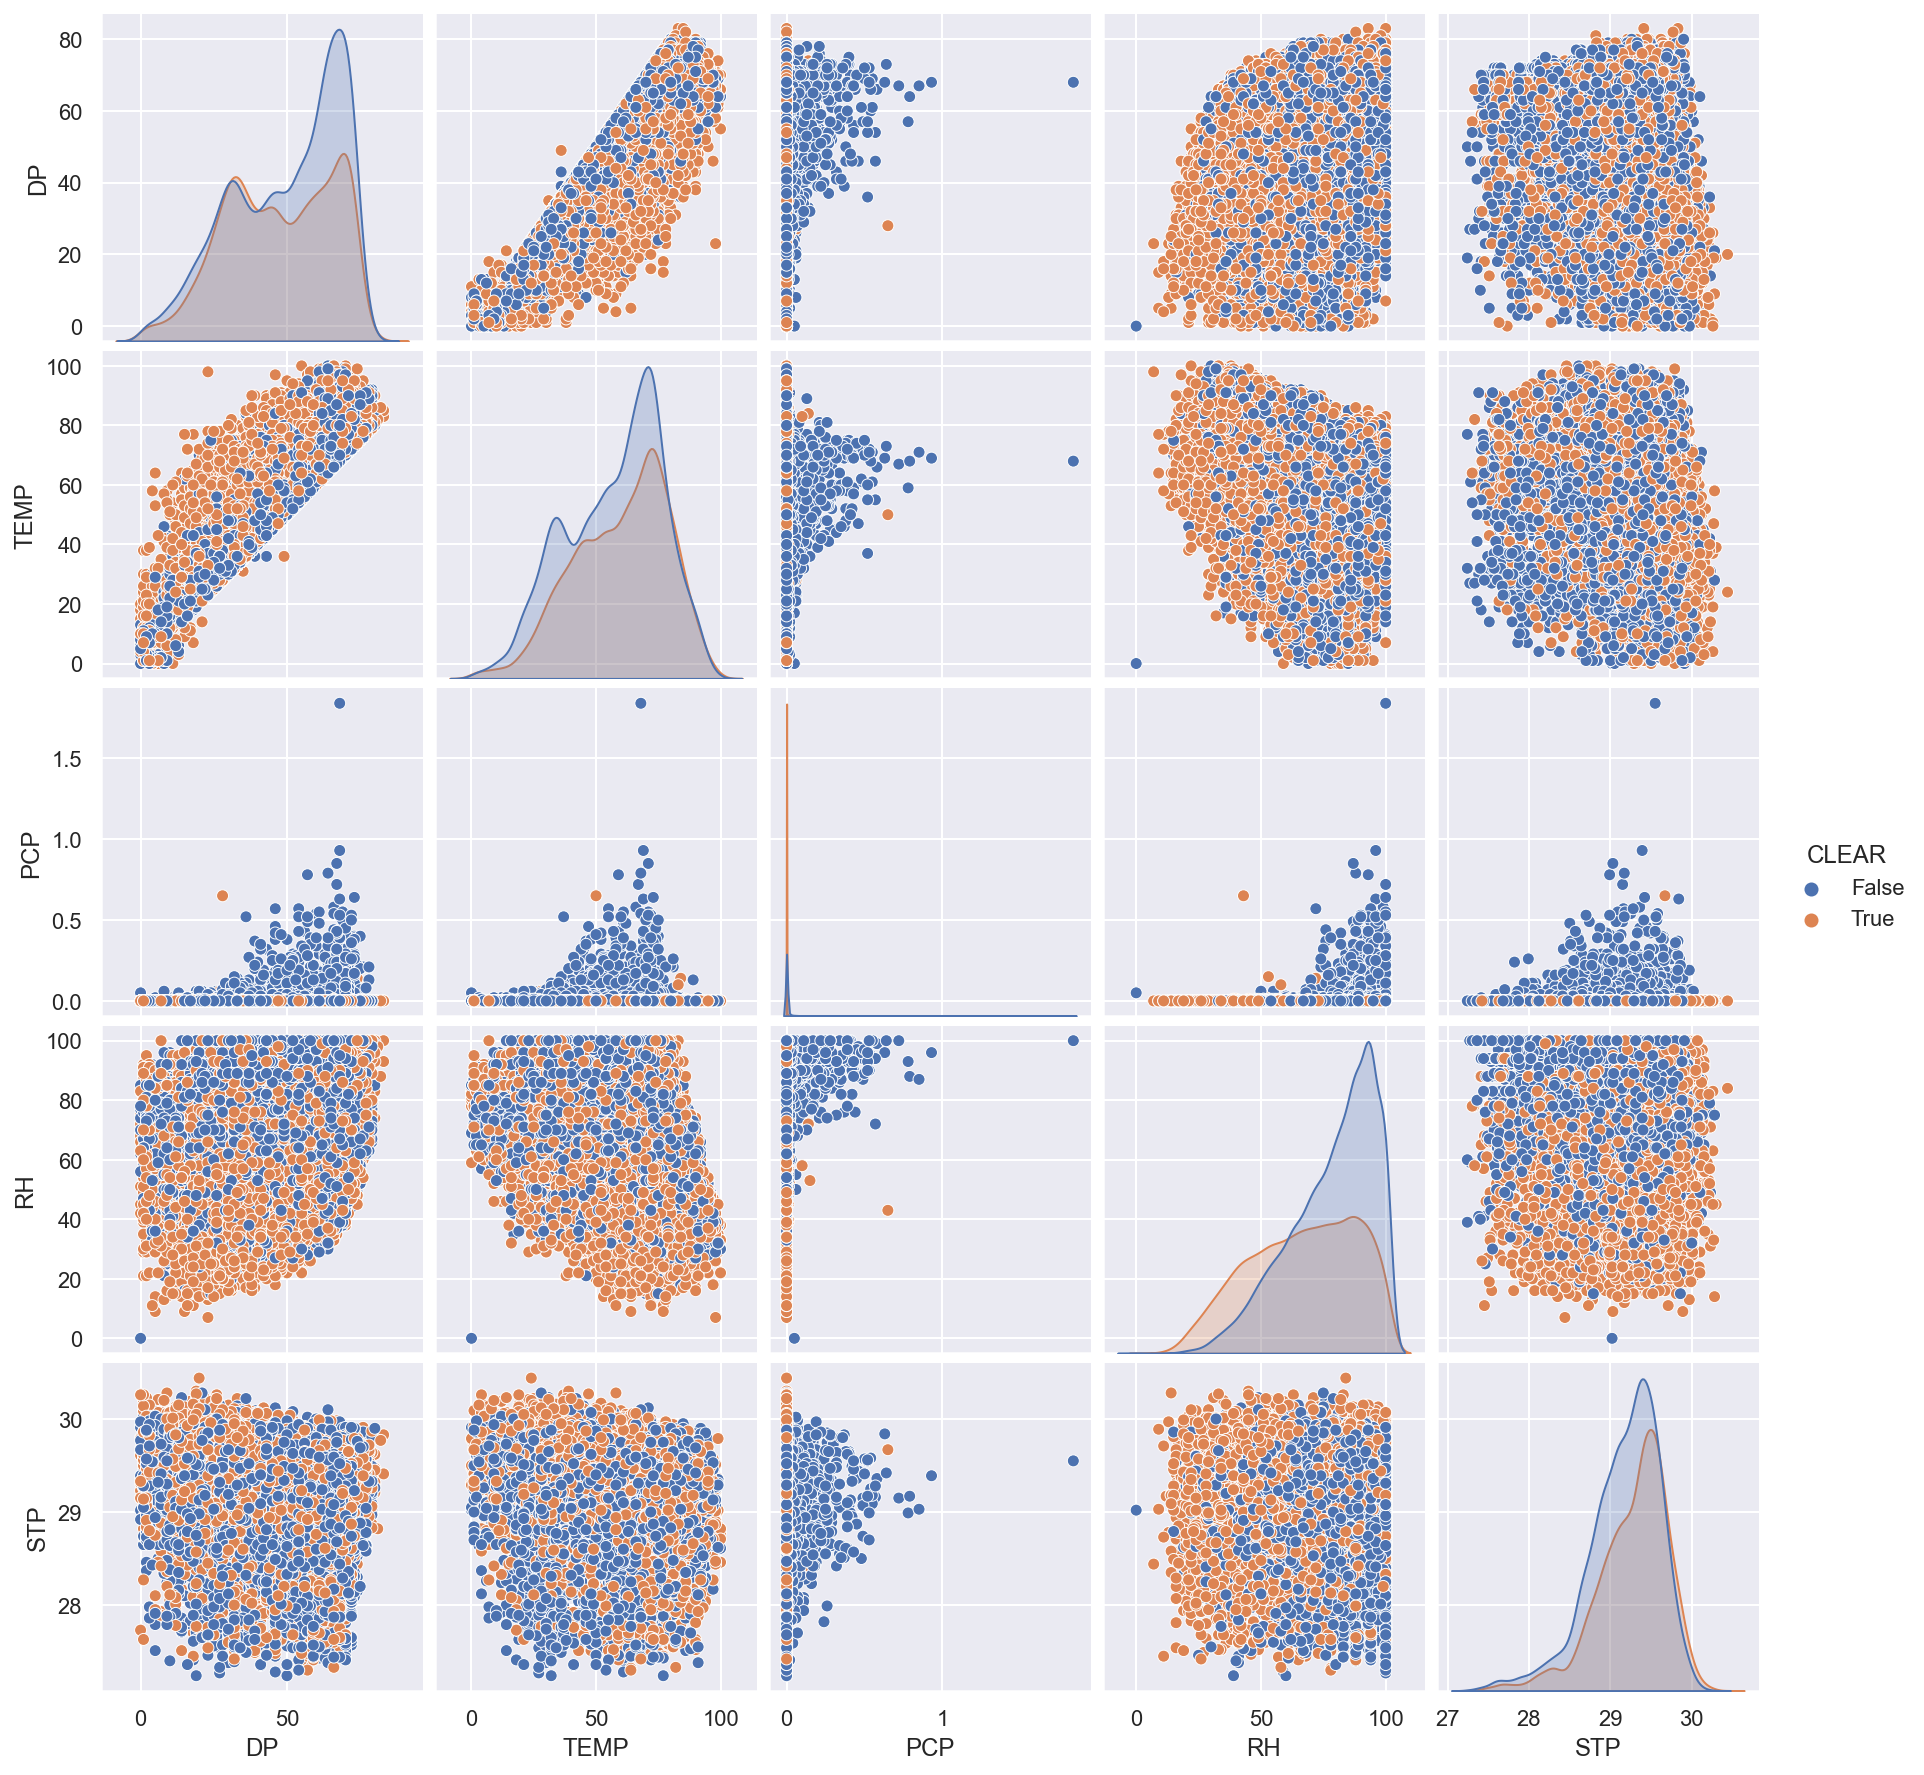

In [22]:
sns.pairplot(train_df, hue='CLEAR');

In [23]:
# X_train.DP.hist()

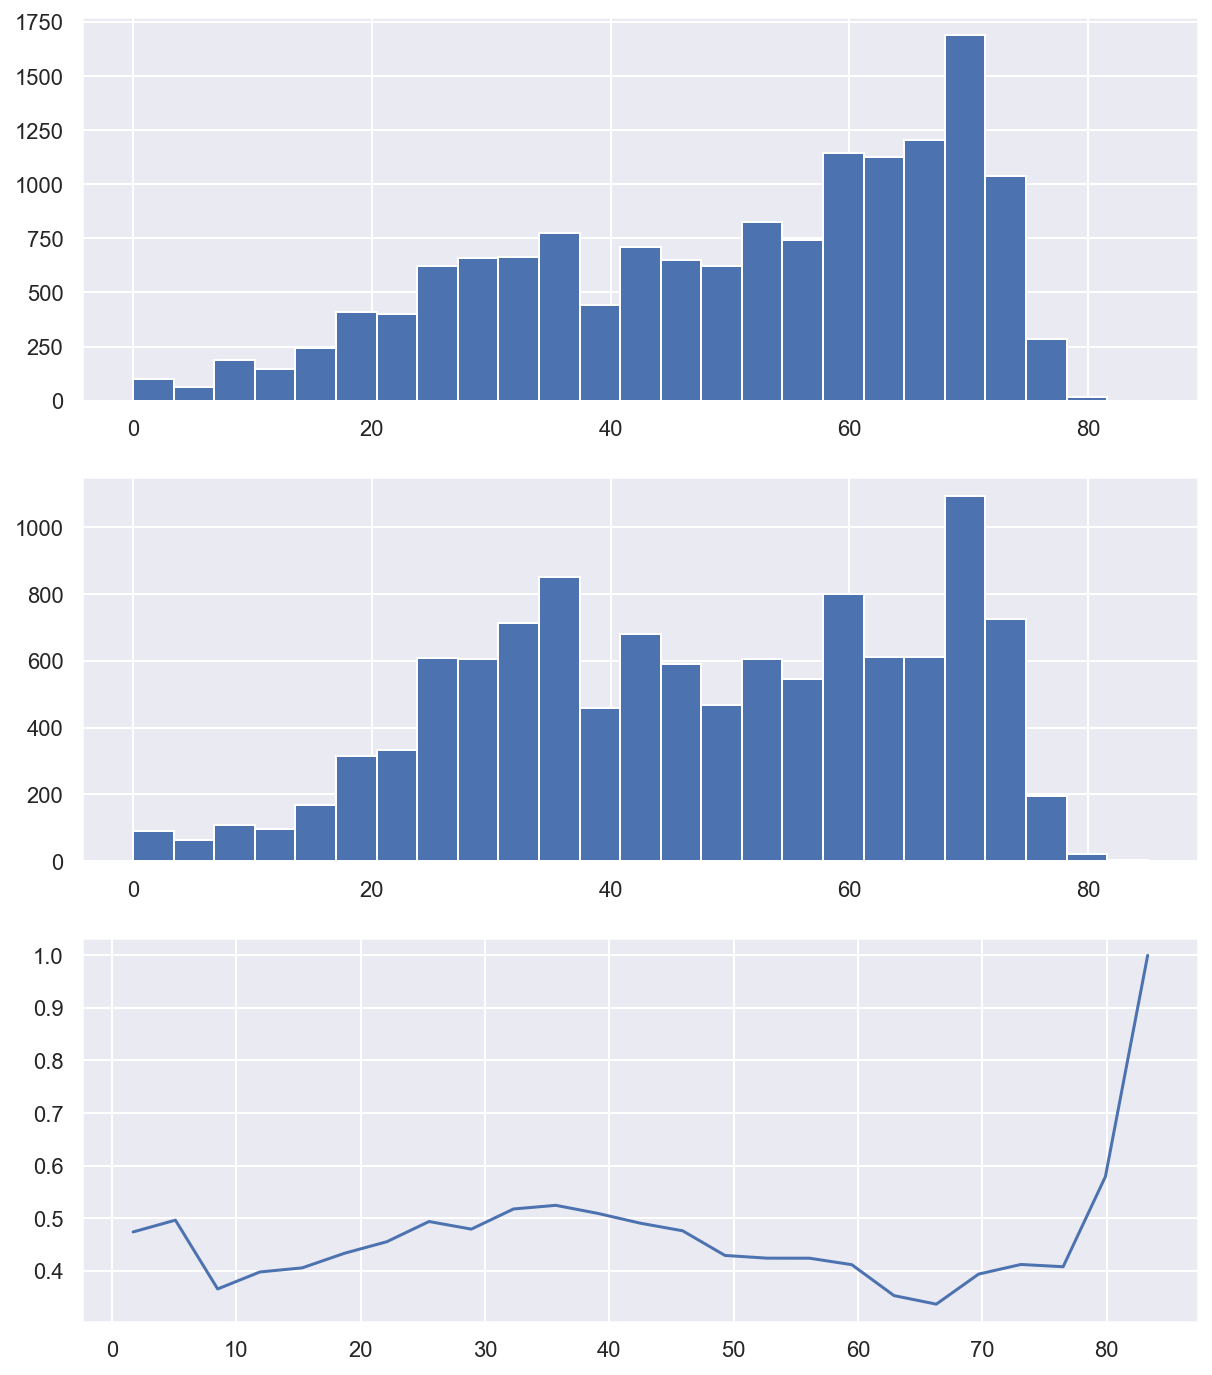

In [24]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'DP'], bins=25, range=(0,85))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'DP'], bins=25, range=(0,85))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

In [25]:
# X_train.TEMP.hist()

/var/folders/_g/0w700wks7s1f9mzvhbcn7vvc0000gn/T/ipykernel_26381/244648368.py:5: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));


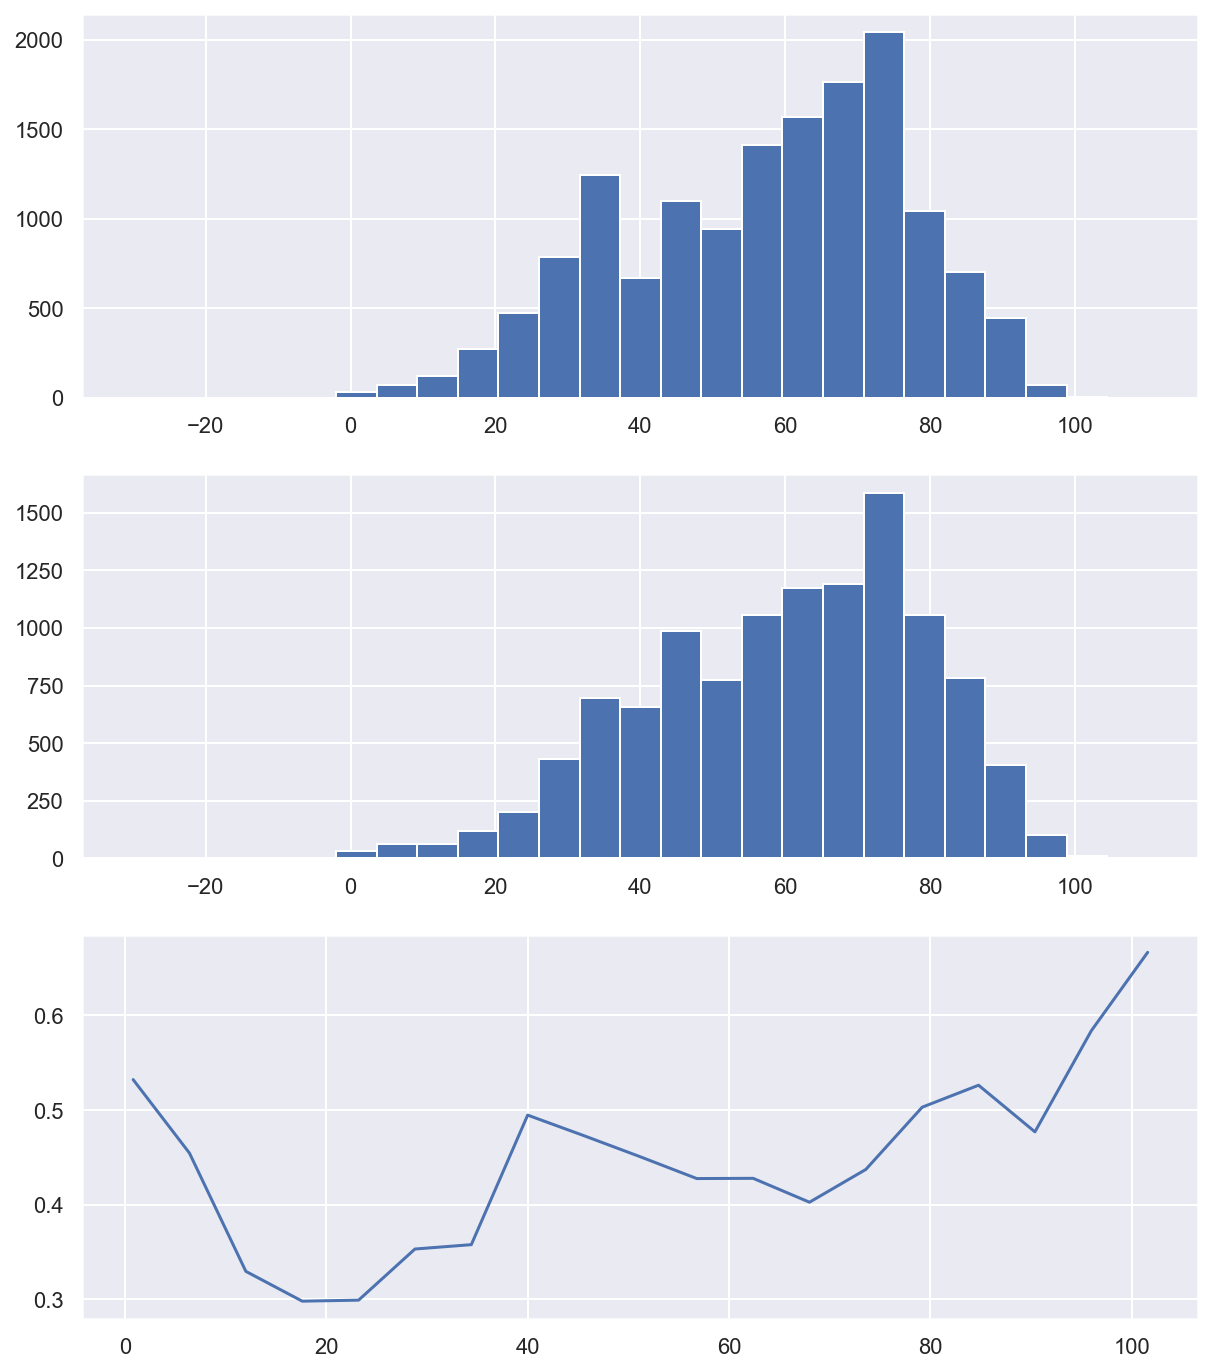

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'TEMP'], bins=25, range=(-30,110))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'TEMP'], bins=25, range=(-30,110))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

In [27]:
# X_train.PCP.hist()

In [28]:
# X_train.RH.hist()

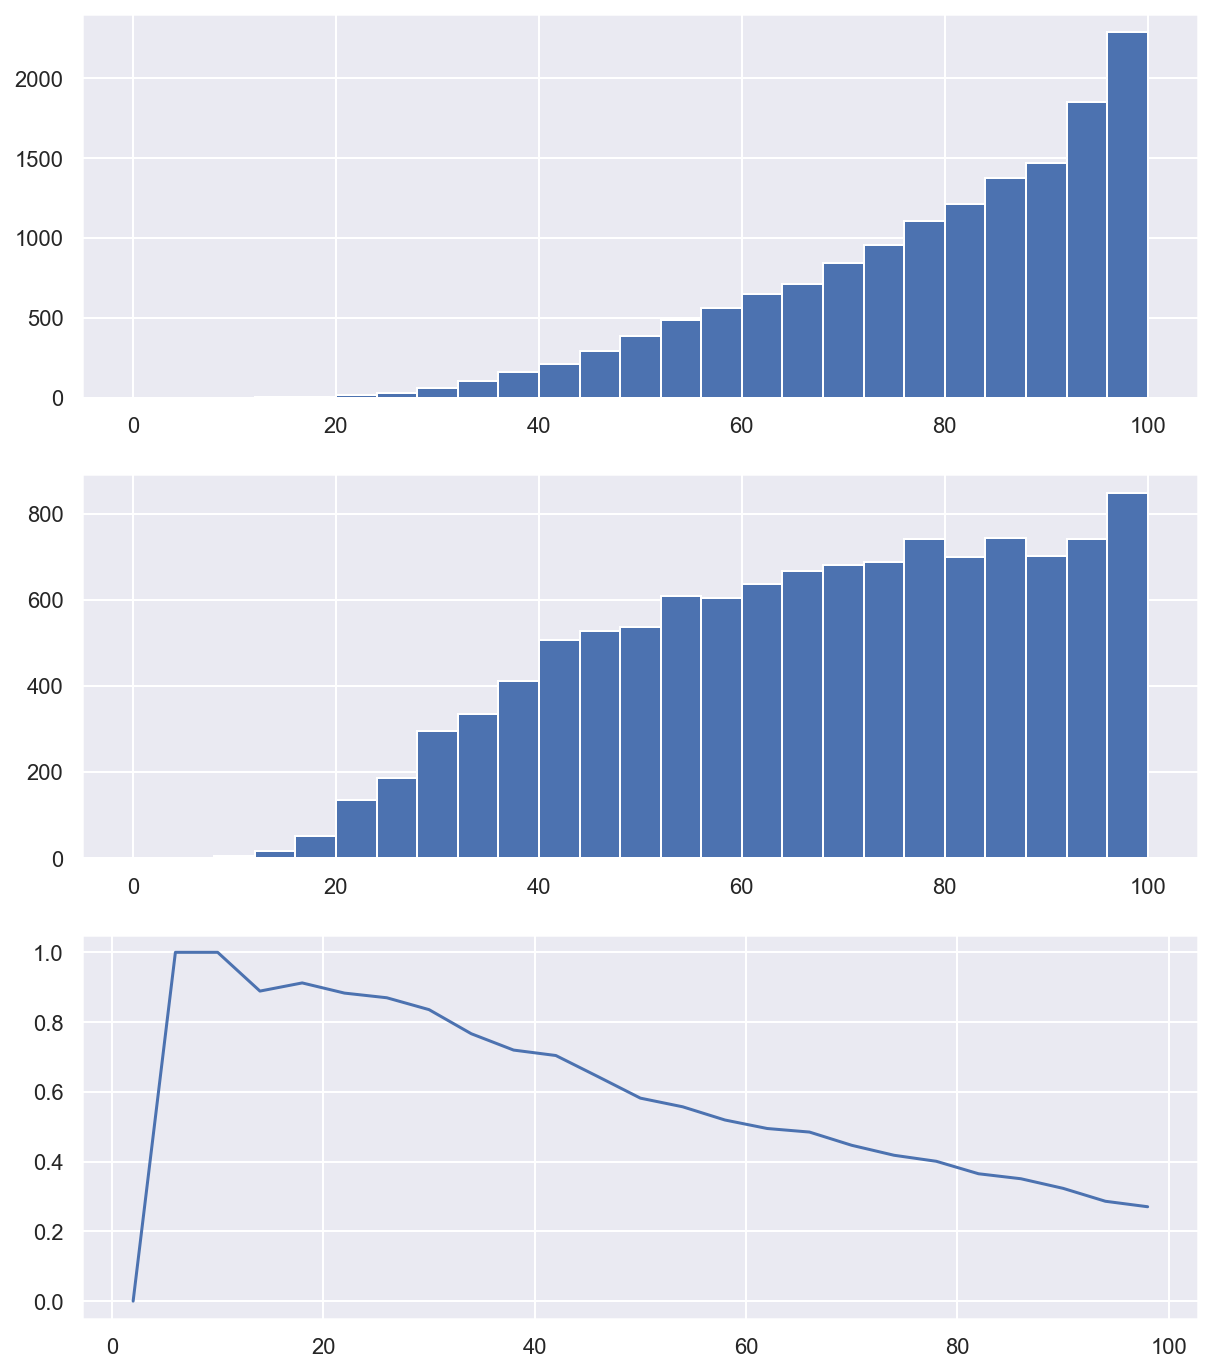

In [29]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'RH'], bins=25, range=(0,100))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'RH'], bins=25, range=(0,100))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

In [30]:
# X_train.STP.hist()

/var/folders/_g/0w700wks7s1f9mzvhbcn7vvc0000gn/T/ipykernel_26381/3630600052.py:5: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));


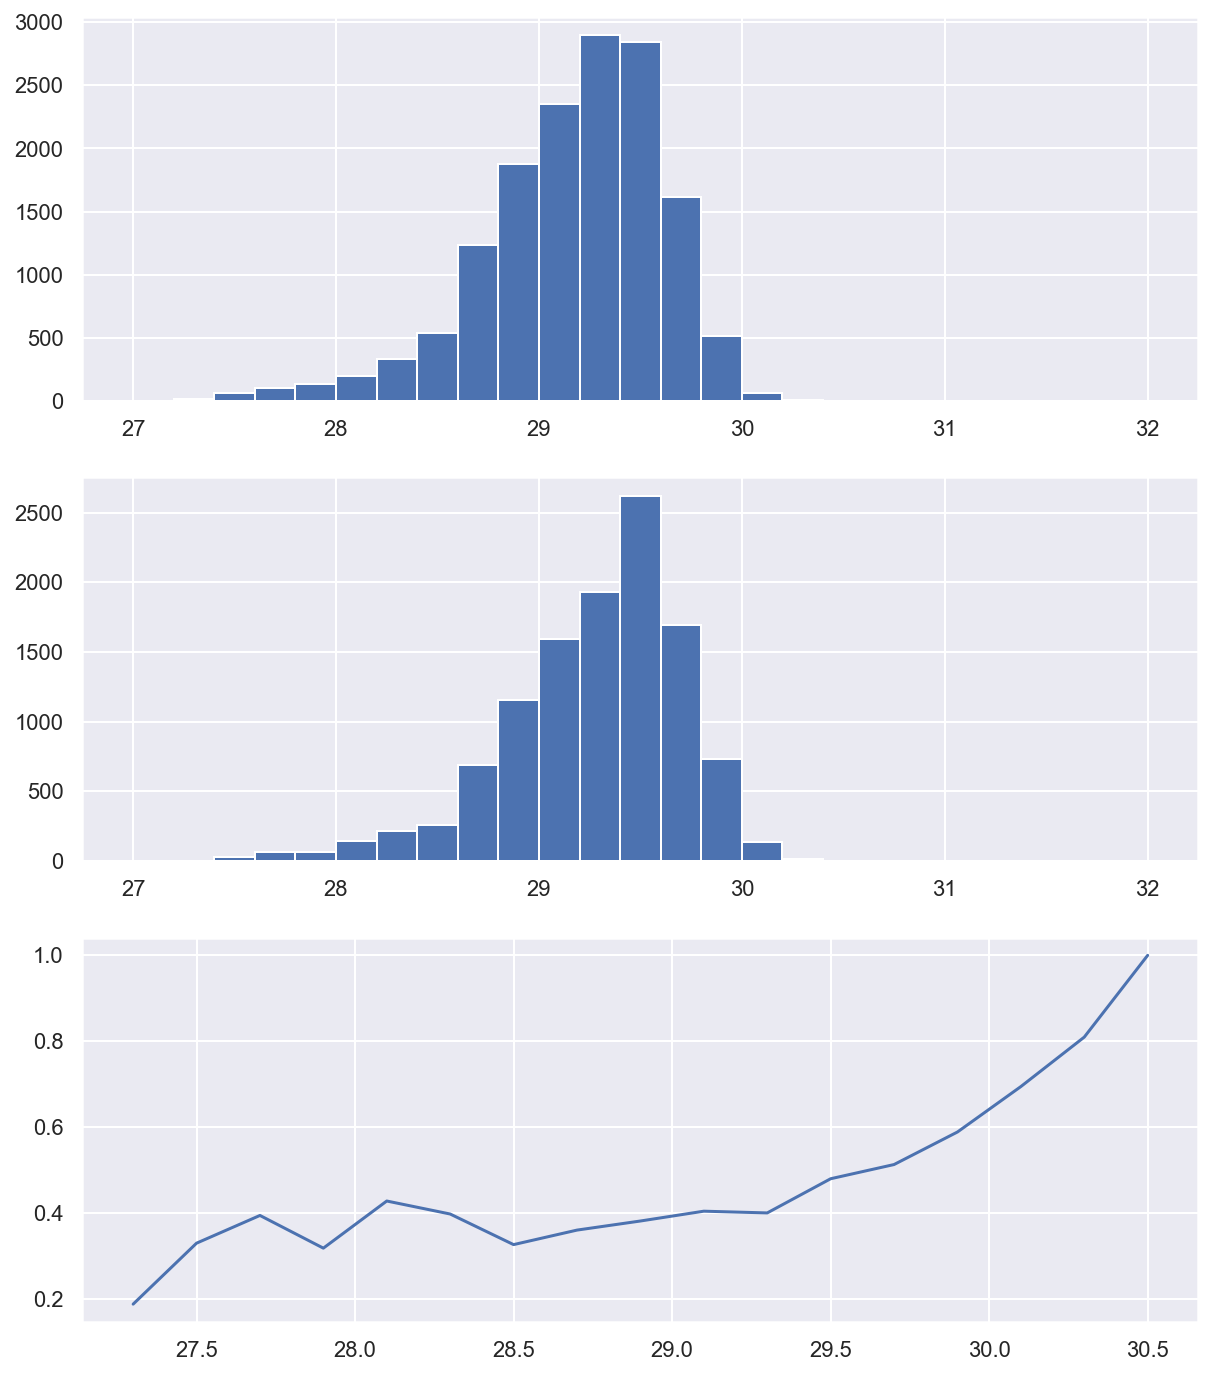

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'STP'], bins=25, range=(27,32))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'STP'], bins=25, range=(27,32))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

# Last five features

In [32]:
X_train, X_test, y_train, y_test = train_test_split(obs.iloc[:, 14:20], obs.iloc[:, -1], 
                                                    test_size = 0.99, random_state=42)

train_df = X_train.copy()
train_df['CLEAR'] = y_train
train_df.head()

VIS  WB_TEMP  WIND_DIR  WIND ZONE  MONTH  CLEAR
356858    5.0     72.0     200.0   5.0   8a      9   True
2049497  10.0     22.0     360.0  14.0   8b      2  False
1847912   7.0     56.0     110.0   5.0   4b     10  False
660667   10.0     71.0     160.0  13.0   8a      4   True
777499    2.5     58.0       0.0   0.0   7a      3  False

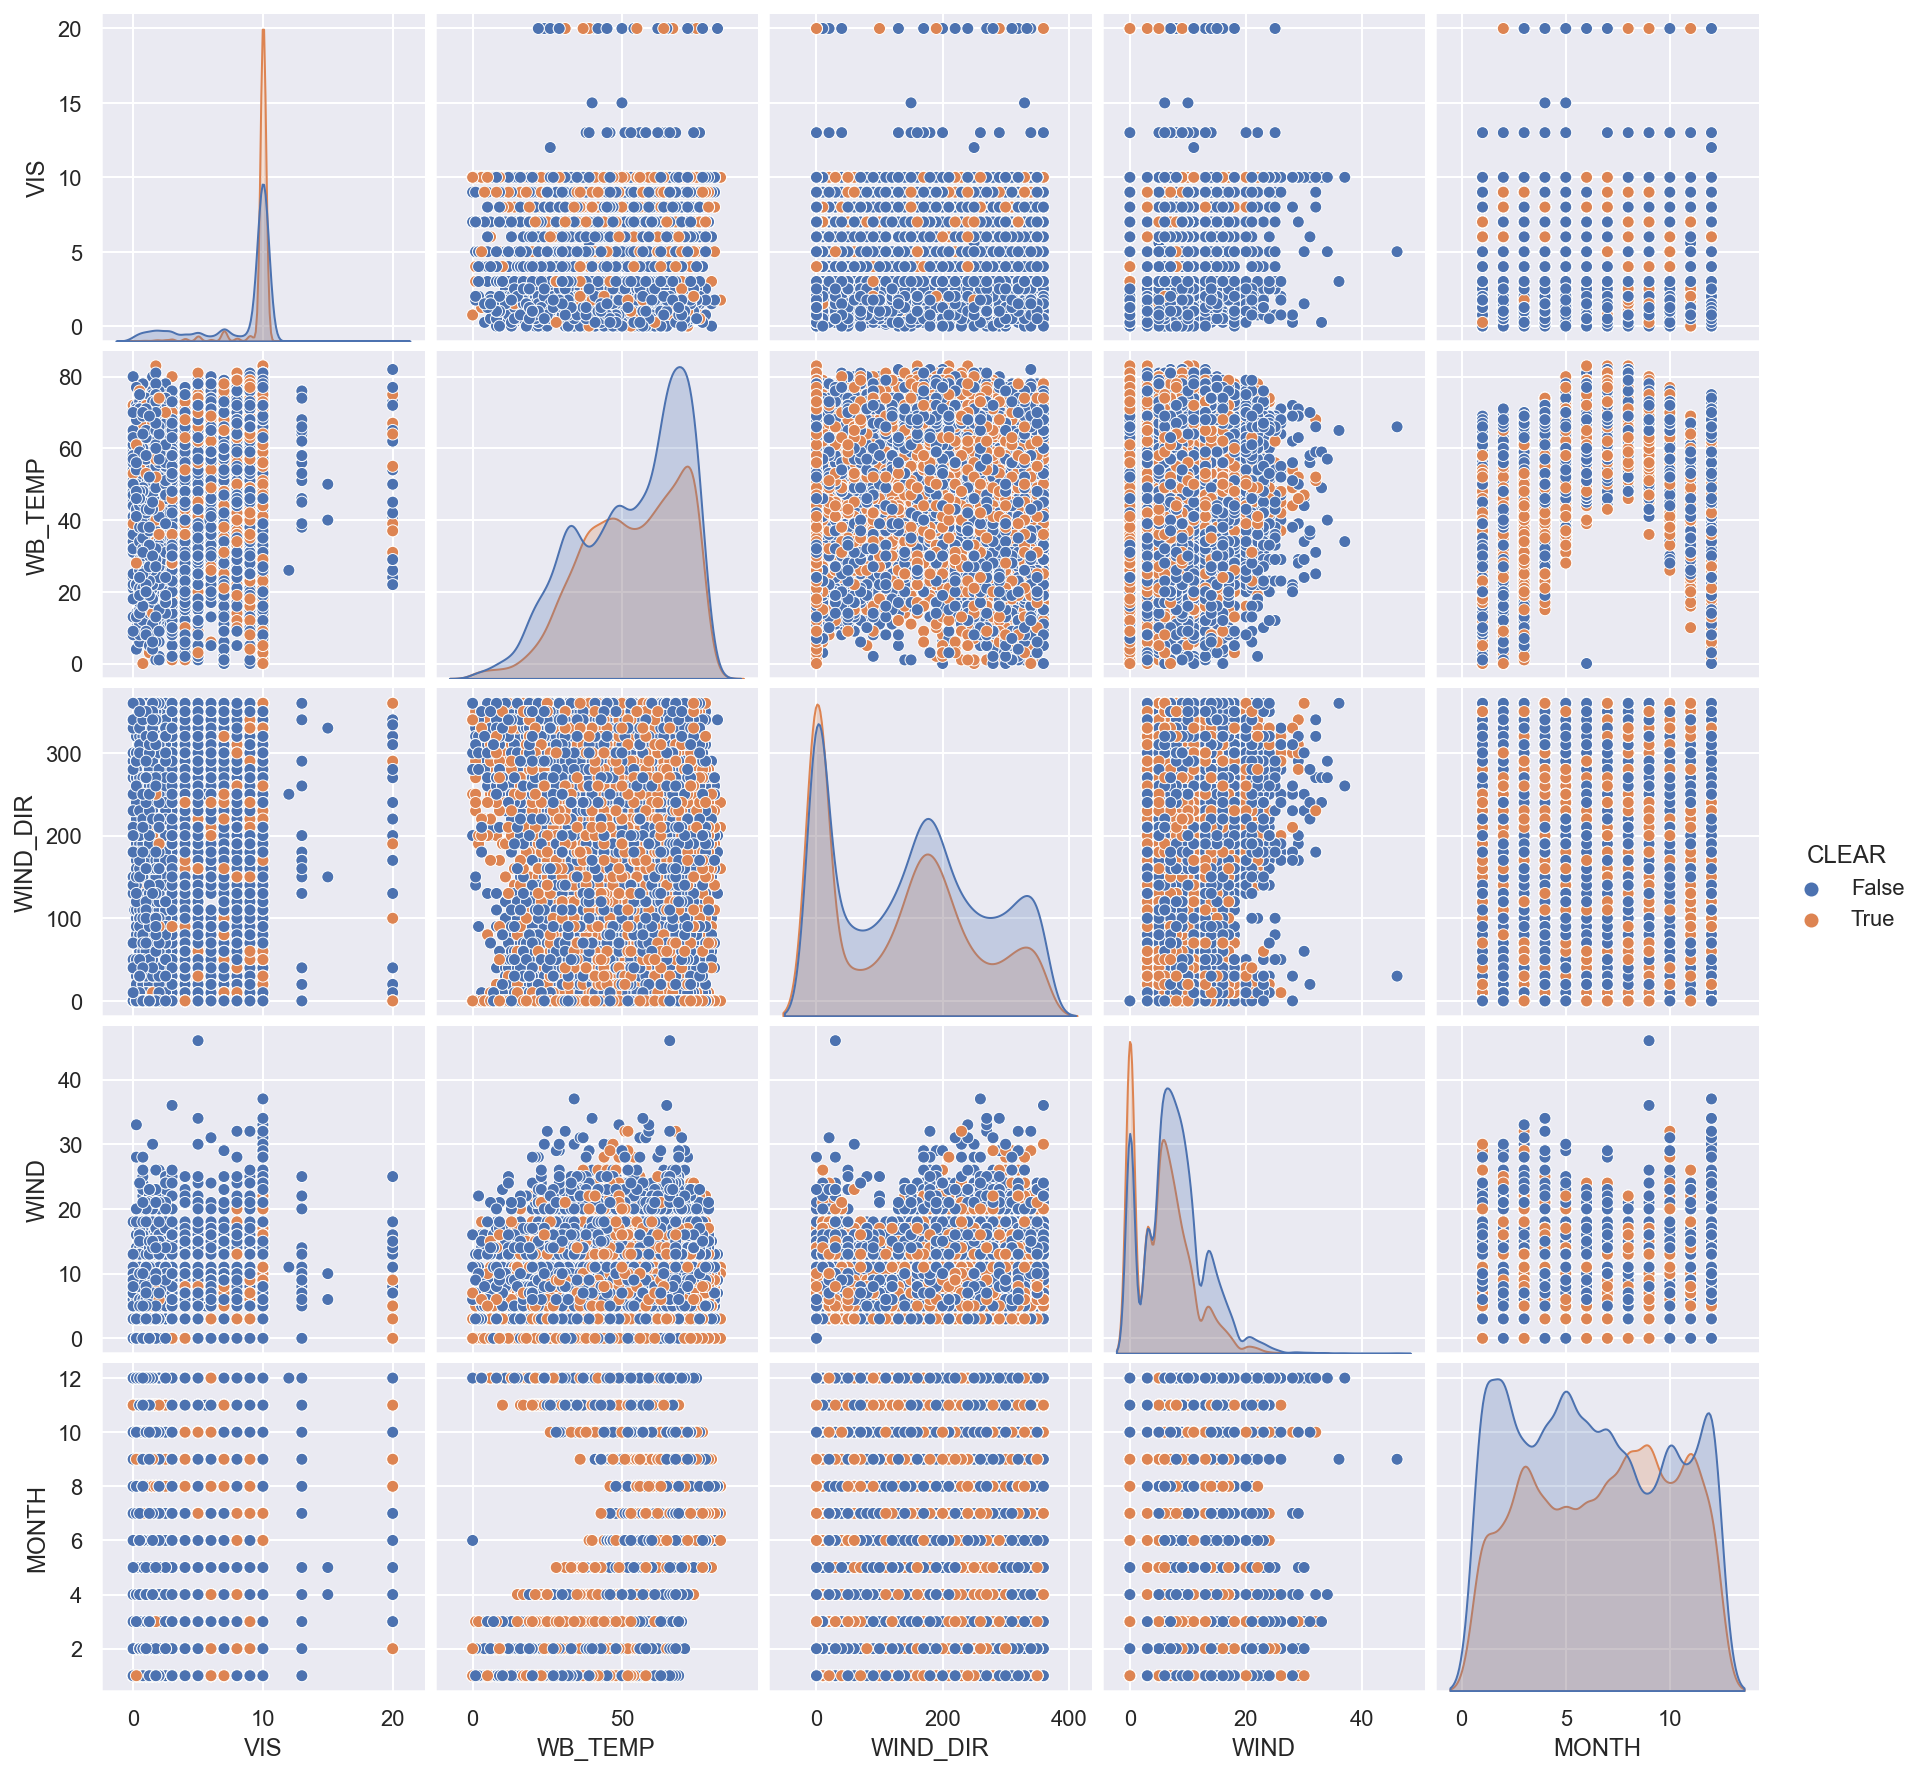

In [33]:
sns.pairplot(train_df, hue='CLEAR');

In [34]:
# X_train.VIS.hist()

/var/folders/_g/0w700wks7s1f9mzvhbcn7vvc0000gn/T/ipykernel_26381/3210710549.py:5: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));


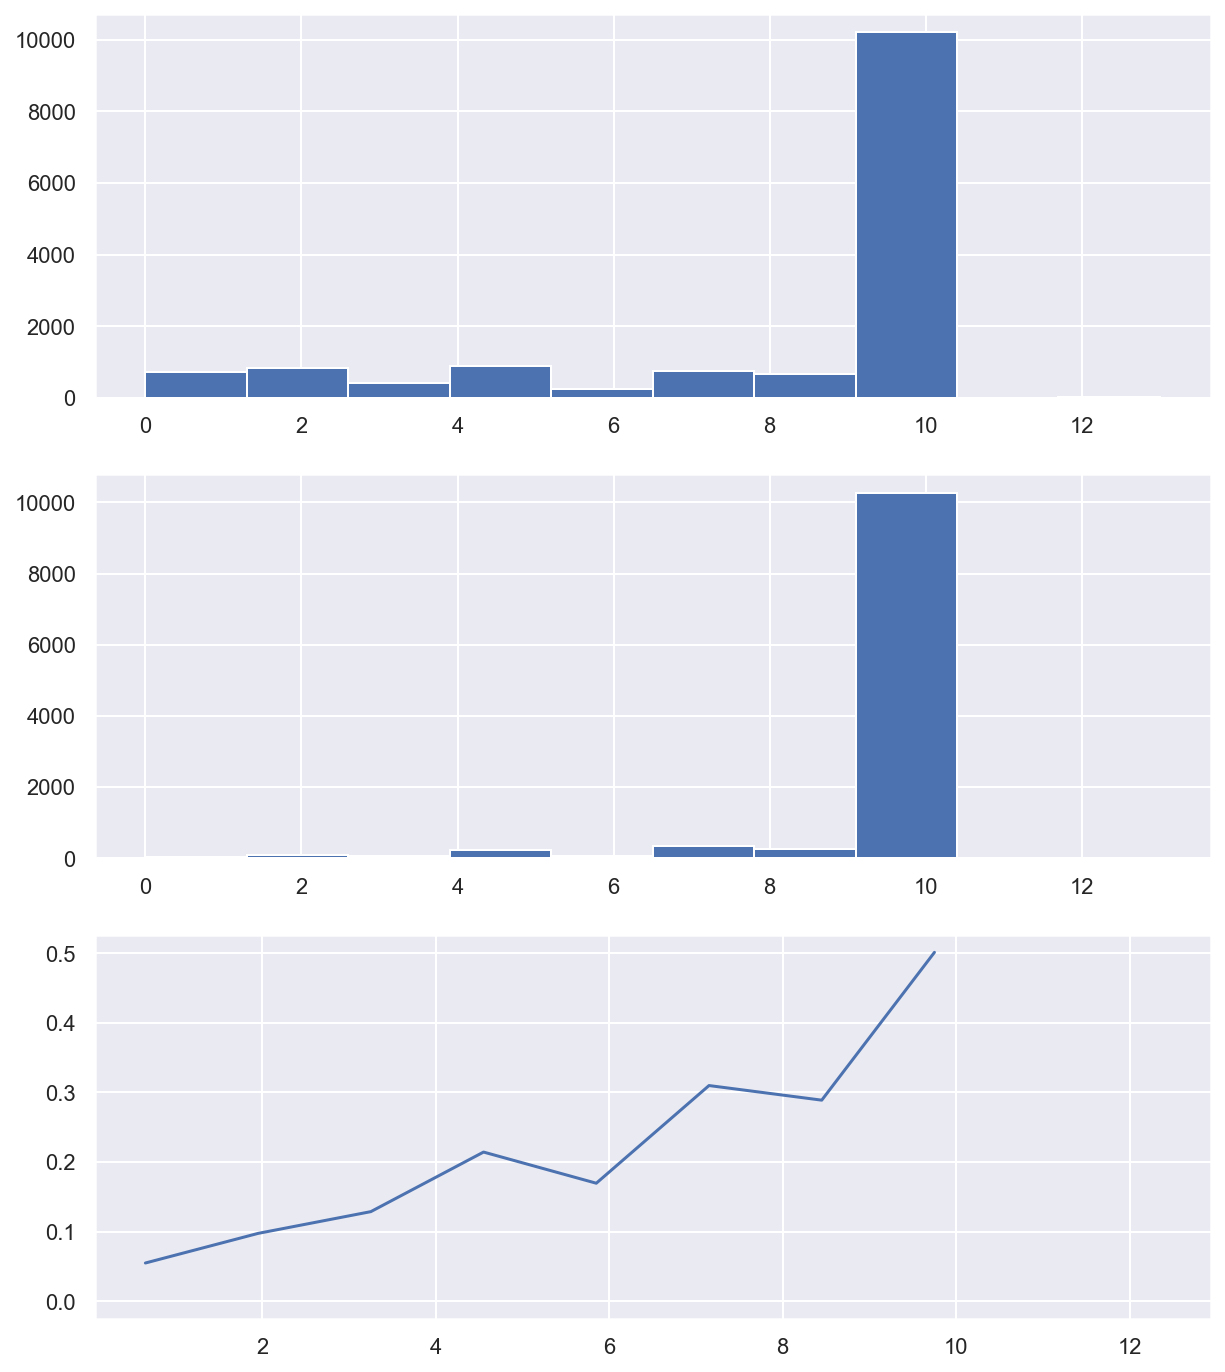

In [35]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'VIS'], bins=10, range=(0,13))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'VIS'], bins=10, range=(0,13))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

In [36]:
# X_train.WB_TEMP.hist()

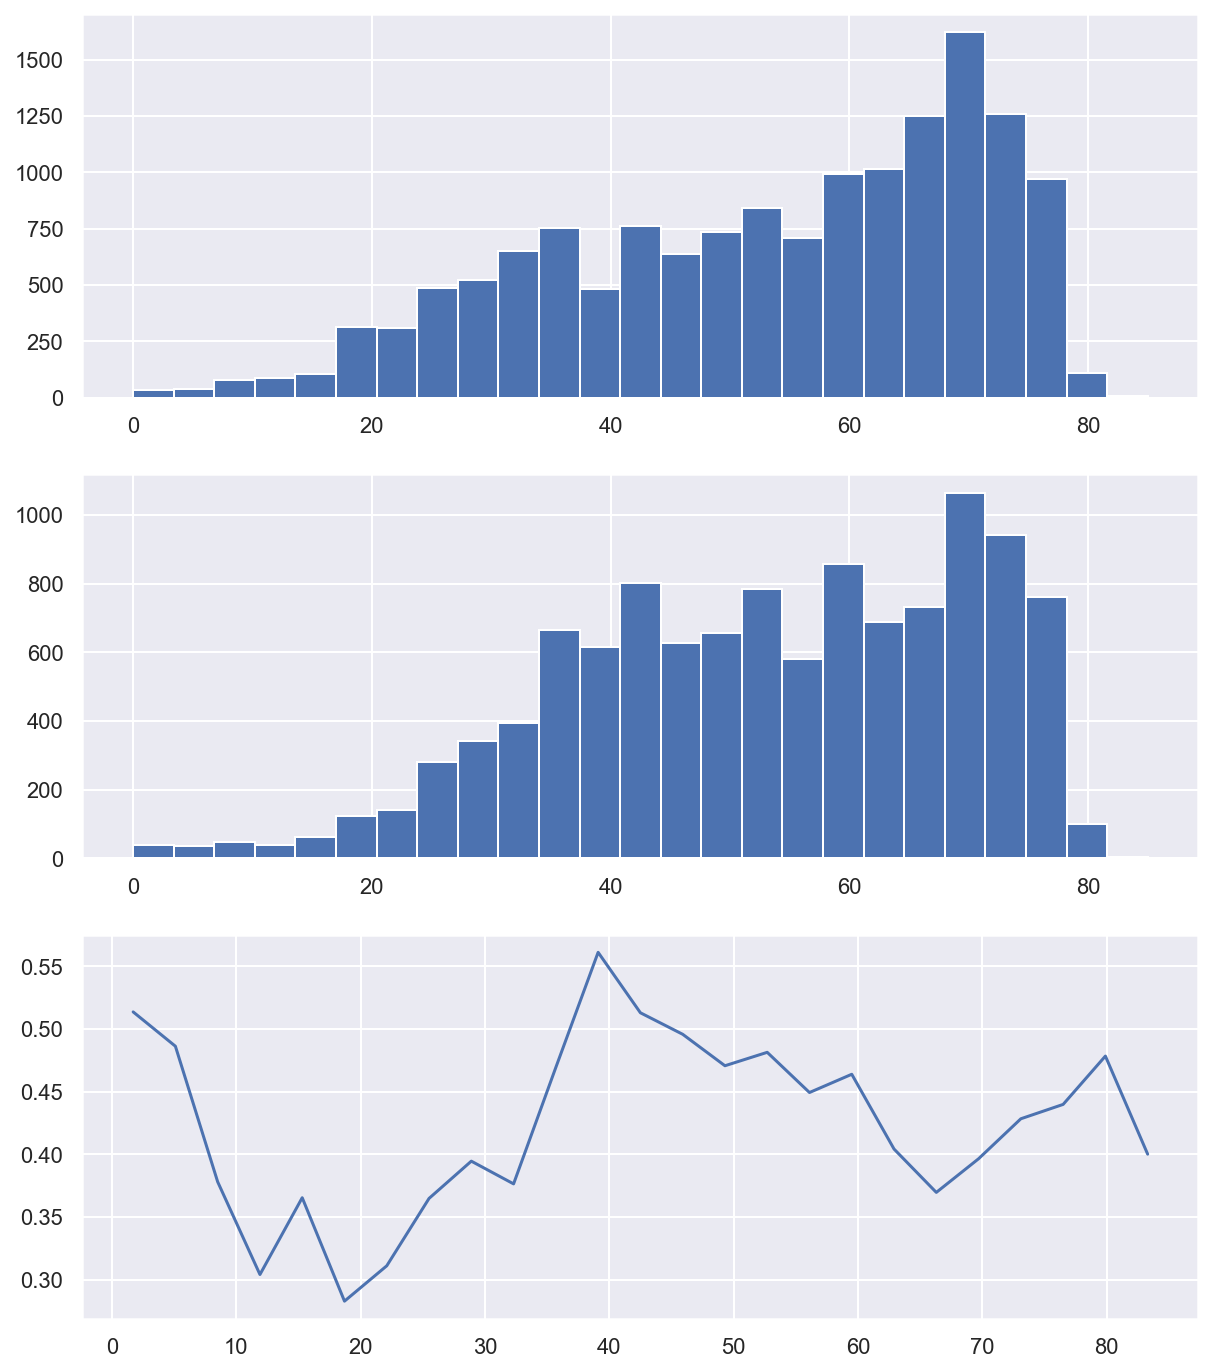

In [37]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'WB_TEMP'], bins=25, range=(0,85))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'WB_TEMP'], bins=25, range=(0,85))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

In [38]:
# X_train.WIND_DIR.hist()

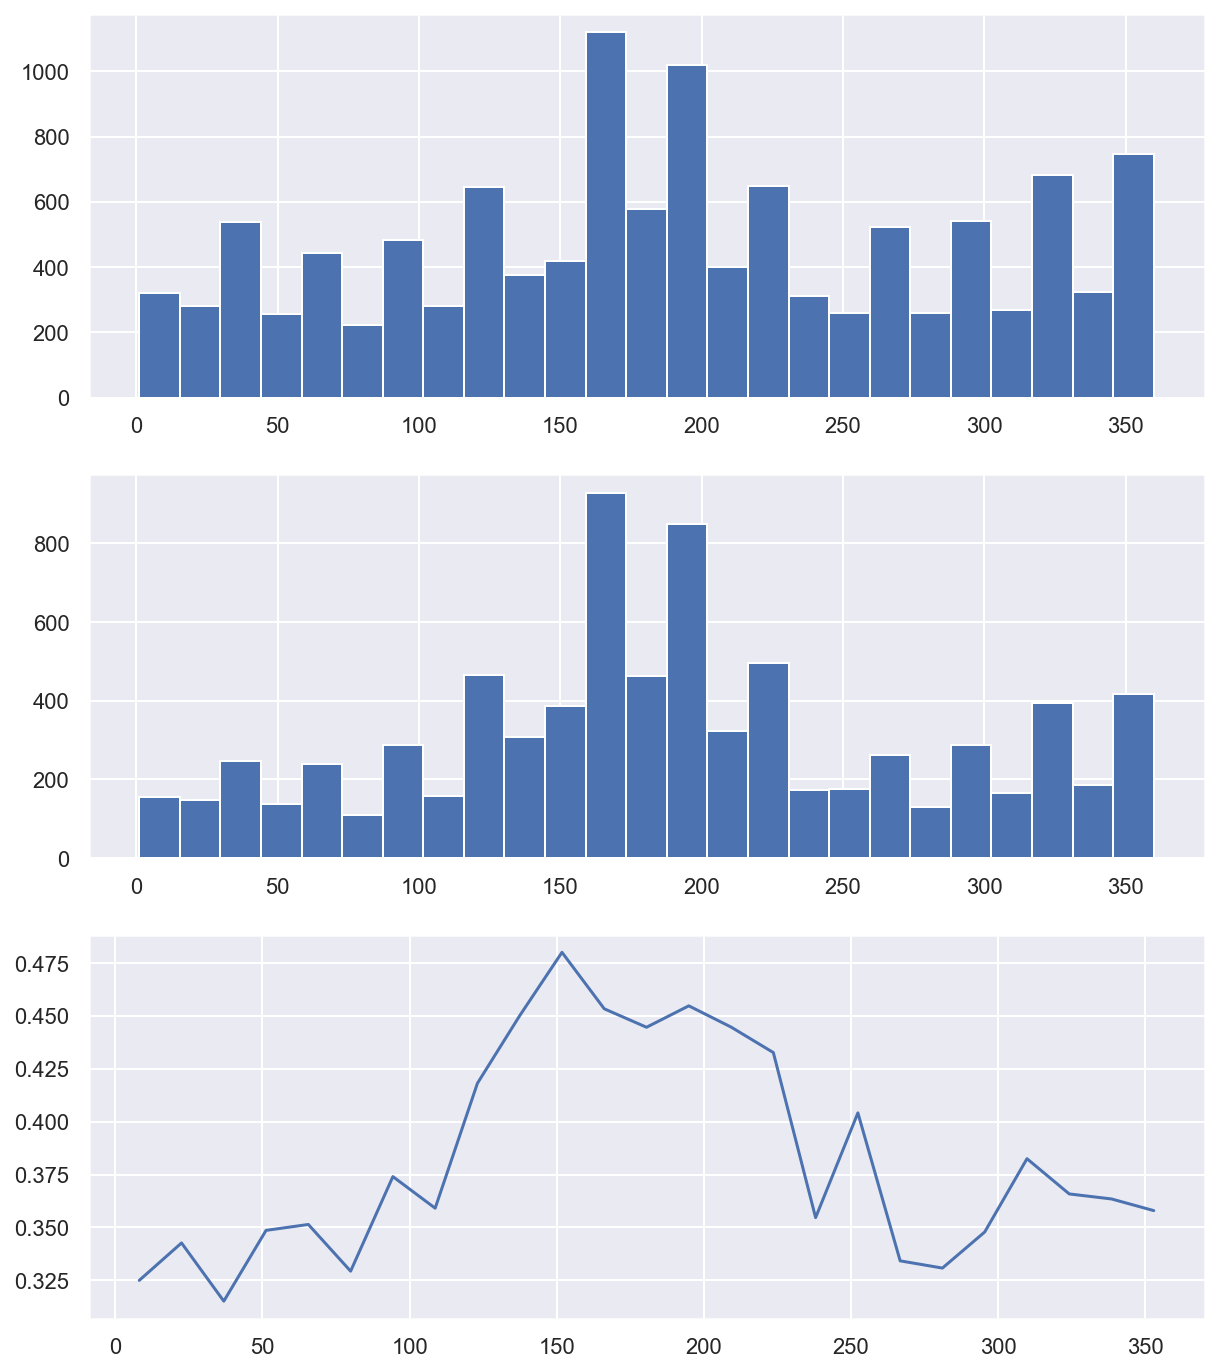

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'WIND_DIR'], bins=25, range=(1,360))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'WIND_DIR'], bins=25, range=(1,360))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

In [40]:
# X_train.WIND.hist()

/var/folders/_g/0w700wks7s1f9mzvhbcn7vvc0000gn/T/ipykernel_26381/3908010669.py:5: RuntimeWarning: invalid value encountered in true_divide
  ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));


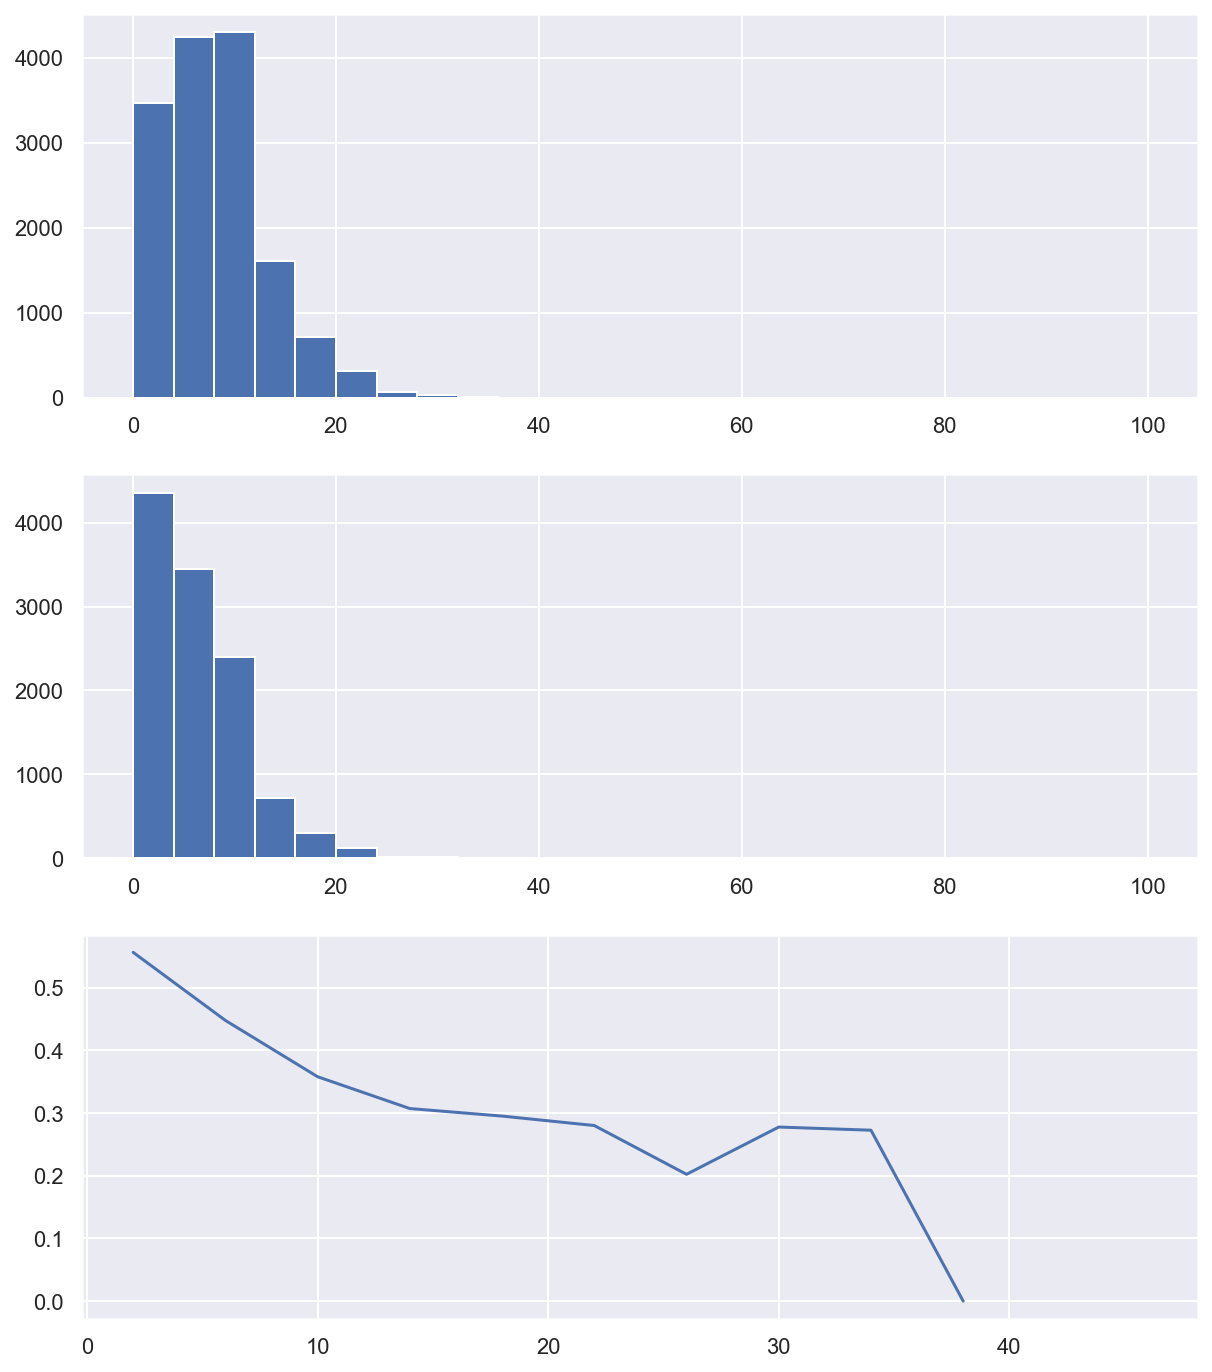

In [41]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'WIND'], bins=25, range=(0,100))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'WIND'], bins=25, range=(0,100))
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

# Model Individual Features

In [42]:
X_train, X_test, y_train, y_test = train_test_split(obs.iloc[:, 5:18], obs.iloc[:, -1], 
                                                    test_size = 0.99, random_state=42)

train_df = X_train.copy()
train_df['CLEAR'] = y_train


In [44]:
for col in X_train.columns:
    print(col)
    X_tr = X_train[[col]]
    X_te = X_test[[col]]
    lr_model = LogisticRegression()
    lr_model.fit(X_tr,y_train)
    y_prob_pred_test = lr_model.predict_proba(X_te)[:,1]
    print(log_loss(y_test,y_prob_pred_test))

LATITUDE
0.675402628878124
LONGITUDE
0.6731033123600471
ELEVATION
0.6837524677260681
ALTSE
0.6552035473651637
DP
0.6817919586183822
TEMP
0.6811468996323113
PCP
0.6729228632882124
RH
0.6396125638686014
STP
0.6771012634080883
VIS
0.6465114852671872
WB_TEMP
0.6838798043294501
WIND_DIR
0.6786580661544889
WIND
0.6643894576190086


In [ ]:
lr_model_all = LogisticRegression(C=1)
lr_model_all.fit(X_train_scaled, y_train)
y_prob_pred_test = lr_model_all.predict_proba(X_test)[:,1]
print(log_loss(y_test,y_prob_pred_test))

In [ ]:
# sns.pairplot(train_df, hue='CLEAR');